<a href="https://colab.research.google.com/github/Charee-Villapong/charee-villapong/blob/master/Machine_Learning_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Python（scikit-learn）による機械学習実装20問**

https://www.youtube.com/watch?v=Fbynk_9TfXg&t=782s

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning Training/data.csv のコピー")

In [4]:
data.head()

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male


In [5]:
data.isnull()

,Name,Age,Sex
0,False,False,False
1,False,False,False
2,False,False,True
3,False,False,False
4,False,False,False
...,...,...,...
886,False,False,False
887,False,False,False
888,False,True,False
889,False,False,False


In [6]:
data.isnull().sum()

Name      0
Age     177
Sex      13
dtype: int64

In [7]:
data_dropna = data.dropna()

In [8]:
data.shape

(891, 3)

In [9]:
data_dropna.shape

(704, 3)

In [10]:
data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
data.columns

Index(['Name', 'Age', 'Sex'], dtype='object')

In [12]:
mean = int(data[["Age"]].mean())
df_zero = data[["Age"]].fillna(mean)
df_zero.tail()

,Age
886,27.0
887,19.0
888,29.0
889,26.0
890,32.0


In [13]:
data.tail()

,Name,Age,Sex
886,"Montvila, Rev. Juozas",27.0,male
887,"Graham, Miss. Margaret Edith",19.0,female
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female
889,"Behr, Mr. Karl Howell",26.0,male
890,"Dooley, Mr. Patrick",32.0,male


In [14]:
median = data[["Age"]].median()
df_median = data[["Age"]].fillna(median)
df_median.tail()

,Age
886,27.0
887,19.0
888,28.0
889,26.0
890,32.0


In [15]:
mean = data["Age"].mean()
std = data["Age"].std()
median = data["Age"].median()
num = data["Age"].isnull().sum()

In [16]:
rand = np.random.randint(mean - std,mean + std,size= num)

乱数補完

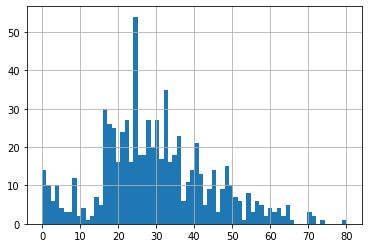

In [17]:
data["Age"].dropna().astype(int).hist(bins=70)

In [18]:
data["Age"][data["Age"].isnull()] = rand

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
data["Age"].isnull().sum()

0

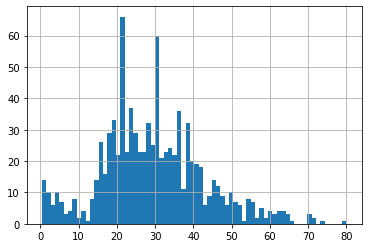

In [20]:
data["Age"].hist(bins=70)

In [21]:
data[["Sex"]].head()

,Sex
0,male
1,female
2,NaN
3,female
4,male


In [22]:
data[["Sex"]].fillna(method = "ffill")

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [23]:
pd.get_dummies(data["Sex"]).drop("male",axis=1)

,female
0,0
1,1
2,0
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
mmscaler = MinMaxScaler(copy=True)

In [26]:
lim_min , lim_max = data["Age"].min(),data["Age"].max()

In [27]:
lim_min , lim_max

(0.42, 80.0)

In [28]:
np.array([lim_min,lim_max]).reshape(-1,1)

array([[ 0.42],
       [80.  ]])

In [29]:
mmscaler.fit(np.array([lim_min,lim_max]).reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [30]:
mmscaler.transform(data[["Age"]])

array([[0.27117366],
       [0.4722292 ],
       [0.32143755],
       [0.43453129],
       [0.43453129],
       [0.30887158],
       [0.67328474],
       [0.01985423],
       [0.33400352],
       [0.17064589],
       [0.04498618],
       [0.72354863],
       [0.24604172],
       [0.48479517],
       [0.17064589],
       [0.68585072],
       [0.01985423],
       [0.24604172],
       [0.3842674 ],
       [0.19577783],
       [0.43453129],
       [0.42196532],
       [0.18321186],
       [0.34656949],
       [0.09525006],
       [0.4722292 ],
       [0.37170143],
       [0.23347575],
       [0.50992712],
       [0.3842674 ],
       [0.49736115],
       [0.4722292 ],
       [0.18321186],
       [0.8240764 ],
       [0.34656949],
       [0.52249309],
       [0.49736115],
       [0.25860769],
       [0.22090978],
       [0.17064589],
       [0.49736115],
       [0.33400352],
       [0.42196532],
       [0.03242021],
       [0.23347575],
       [0.39683338],
       [0.25860769],
       [0.421

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
ss = StandardScaler()

In [33]:
ss.fit_transform(data[["Age"]]).std()

0.9999999999999999

In [34]:
df_wine = pd.read_csv("/content/drive/MyDrive/Machine Learning Training/wine.csv のコピー")

In [35]:
df_wine.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
df_wine.iloc[:,1:]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [37]:
_dfs = ss.fit_transform(df_wine.iloc[:,1:])

In [38]:
_dfs

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [39]:
dfs = pd.DataFrame(_dfs,columns=df_wine.columns[1:])

In [40]:
dfs.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA()
pca.fit(dfs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [43]:
feature = pca.transform(dfs)

In [44]:
feature = pd.DataFrame(feature,columns = ["PC{}".format(x+1) for x in range(len(dfs.columns))])
feature.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


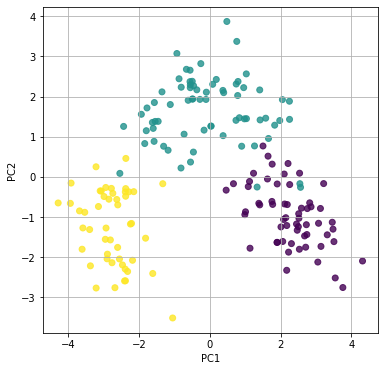

In [45]:
plt.figure(figsize=(6,6))
plt.scatter(feature["PC1"],feature["PC2"],alpha=0.8,c=df_wine["class"])
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = feature.iloc[:,:2]

In [48]:
y = df_wine.iloc[:,0]

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [50]:
X_train

,PC1,PC2
42,3.070807,-1.155919
67,0.183384,2.427146
31,2.677411,-1.471874
141,-2.286561,-0.372508
5,3.050254,-2.122401
...,...,...
21,1.086570,-0.241744
0,3.316751,-1.443463
131,-2.384501,-0.374583
152,-1.812541,-1.527646


In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_pred = lr.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_true=y_test,y_pred=y_pred)

0.9166666666666666

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knc = KNeighborsClassifier(n_neighbors=7)

In [80]:
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [81]:
y_pred = knc.predict(X_test)

In [82]:
score = knc.score(X_test,y_test)
score

0.9444444444444444

In [85]:
df_slump = pd.read_csv("/content/drive/MyDrive/Machine Learning Training/slump.csv のコピー")

In [87]:
df_slump.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,26.82


In [92]:
X = df_slamp.iloc[:,:-1]
Y = df_slump.iloc[:,-1]

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=0)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
regressor = LinearRegression()

In [98]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
from sklearn.metrics import r2_score,mean_squared_error

In [101]:
y_pred = regressor.predict(X_test)

In [103]:
r2_score(y_test,y_pred)

0.8343195909006847

In [104]:
mean_squared_error(y_test,y_pred)

9.390614418464358

In [105]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.064410941512962